In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
# PCA
class PCA():
    def __cov(self, X):
        # 通过协方差矩阵求解
        # cov_matrix = np.cov(X, rowvar=False) # 求协方差矩阵（对称矩阵）O(n*m*m) n=features m=samples
        X_mean = X - np.mean(X, axis=0) # O(m*n)
        cov_matrix = X_mean.T @ X_mean / (X.shape[0] - 1) # O(m*n)
        return np.linalg.eig(cov_matrix) # 求特征值、特征向量 O(n^3) n=features
    
    def __SVD(self, X):
        # 求出 XT * X 的特征值矩阵及对应的特征向量,对应特征向量组成右奇异值矩阵
        C = X.T @ X # O(m*n)
        return np.linalg.eig(C) # O(n^3)
        
    def transform(self, X, k, svd=True):
        [eigValues, eigVectors] = self.__SVD(X) if svd else self.__cov(X)
        
        # 排序，找出topk个特征值对应的特征向量，组成变换矩阵 O(nlogn)
        eigValuesIndex = np.argsort(eigValues)
        eigValuesIndex_k = eigValuesIndex[:-(k+1):-1]
        U = eigVectors[eigValuesIndex_k, :]
    
        U = U / np.linalg.norm(U, axis=0) # 向量归一化
        # 获得降维变换矩阵
        
        return U @ X.T

In [7]:
data = pd.read_csv("csv/feature_data_640.csv")
X = data.to_numpy()
labels = pd.read_csv("csv/label_data_640.csv")
labels = labels.to_numpy()

In [8]:
k = 2
pca = PCA()

start_time = time.time()
Y = pca.transform(X, 2, True)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"花费时间：{elapsed_time} 秒")

pc1 = Y[0,:]
pc2 = Y[1,:]

花费时间：0.03854870796203613 秒


C:\Users\kaleidoscope\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\kaleidoscope\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


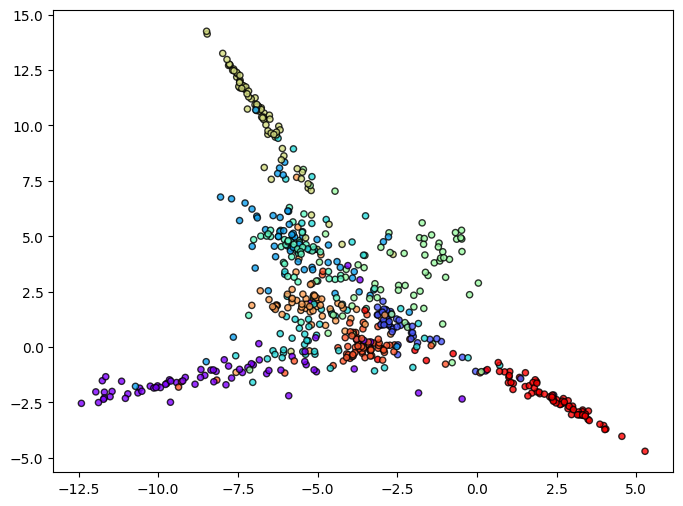

In [9]:
import matplotlib.pyplot as plt
# 绘制点图
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=labels, cmap='rainbow', edgecolors='k', alpha=0.8, s=20)
plt.show()

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Y = pca.fit_transform(X)

pc1 = Y[:,0]
pc2 = Y[:,1]

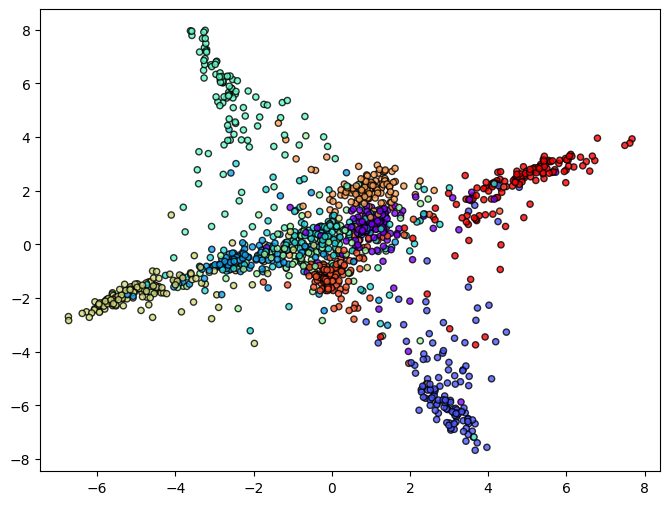

In [17]:
import matplotlib.pyplot as plt
# 绘制点图
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=labels, cmap='rainbow', edgecolors='k', alpha=0.8, s=20)
plt.show()